In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_movies = pd.read_csv('data/processed/title_basics_with_ratings.tsv.gz', sep='\t', compression='gzip')

In [3]:
df_movies

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000009,Miss Jerry,Miss Jerry,1894,45,Romance,5.4,223.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,70,"Action,Adventure,Biography",6.0,983.0
2,tt0000591,The Prodigal Son,L'enfant prodigue,1907,90,Drama,5.7,32.0
3,tt0000679,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,1908,120,"Adventure,Fantasy",5.3,79.0
4,tt0000941,Locura de amor,Locura de amor,1909,45,Drama,4.8,32.0
...,...,...,...,...,...,...,...,...
236977,tt9916190,Safeguard,Safeguard,2020,95,"Action,Adventure,Thriller",3.6,263.0
236978,tt9916270,Il talento del calabrone,Il talento del calabrone,2020,84,Thriller,5.8,1506.0
236979,tt9916362,Coven,Akelarre,2020,92,"Drama,History",6.4,6033.0
236980,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123,Drama,8.3,9.0


## Visualizando a distribuição das colunas numericas

Text(0, 0.5, 'Number of Movies')

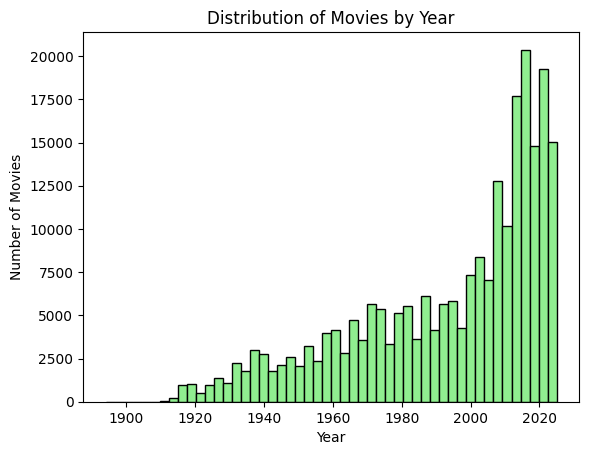

In [4]:
plt.hist(df_movies['startYear'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Movies by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
# plt.xticks(rotation=45)

Text(0, 0.5, 'Number of Movies')

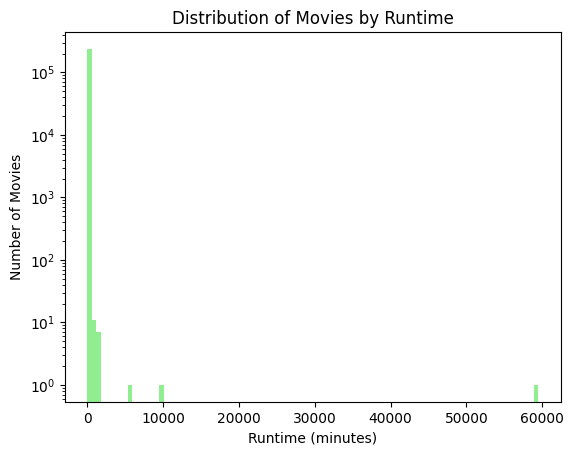

In [5]:
plt.hist(df_movies['runtimeMinutes'], bins=100, color='lightgreen', log=True)
plt.title('Distribution of Movies by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')

Text(0, 0.5, 'Number of Movies')

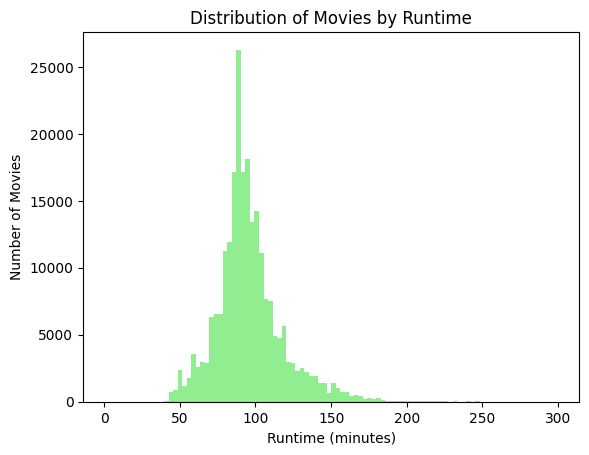

In [6]:
plt.hist(df_movies.loc[df_movies['runtimeMinutes']<300, 'runtimeMinutes'], bins=100, color='lightgreen')
plt.title('Distribution of Movies by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Number of Movies')

Text(0, 0.5, 'Number of Movies')

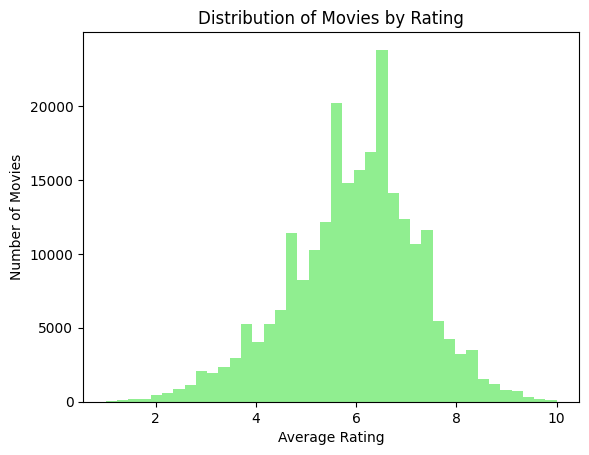

In [7]:
plt.hist(df_movies['averageRating'], bins=40, color='lightgreen')
plt.title('Distribution of Movies by Rating')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')

Text(0, 0.5, 'Log of Number of Movies')

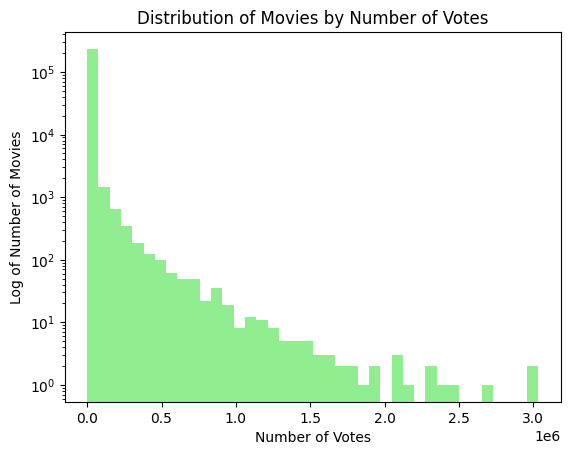

In [8]:
plt.hist(df_movies['numVotes'], bins=40, color='lightgreen', log=True)
plt.title('Distribution of Movies by Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Log of Number of Movies')

In [9]:
aux = list(df_movies['genres'].unique())
unique_genres = set([])

for element in aux:
    if element != '\\N':
        for genre in element.split(','):
            unique_genres.add(genre)


unique_genres = sorted(list(unique_genres))
unique_genres

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [11]:
for genre in unique_genres:
    print(f"{genre:<15} {len(df_movies[df_movies['genres'].str.contains(genre)]):<10}")

Action          29521     
Adventure       17391     
Animation       5154      
Biography       4758      
Comedy          71686     
Crime           25760     
Drama           132481    
Family          10734     
Fantasy         9010      
Film-Noir       863       
Game-Show       3         
History         5329      
Horror          22599     
Music           10590     
Musical         6023      
Mystery         12158     
News            13        
Reality-TV      32        
Romance         32924     
Sci-Fi          7136      
Sport           2294      
Talk-Show       10        
Thriller        25339     
War             5352      
Western         5257      


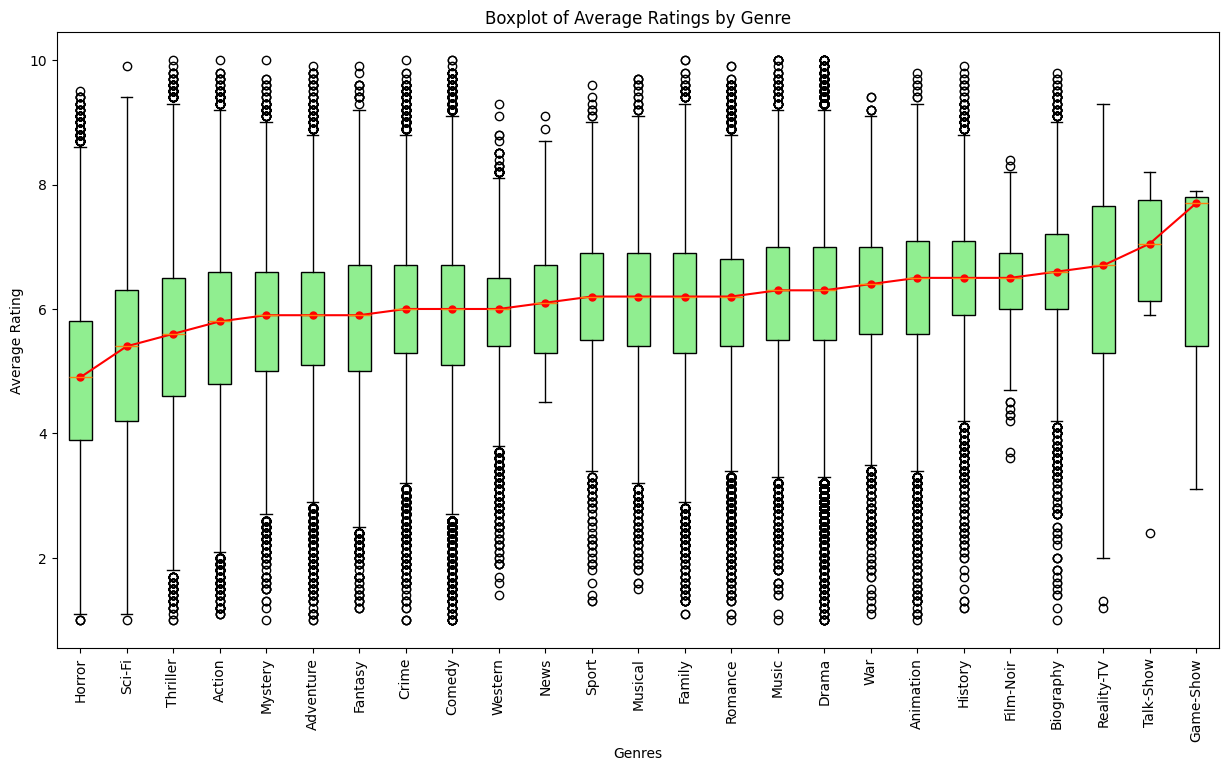

In [28]:
data = [df_movies.loc[df_movies['genres'].str.contains(genre), 'averageRating'] for genre in unique_genres]

# Calcular a mediana de cada gênero
medians = [data[i].median() for i in range(len(unique_genres))]

# Ordenar os gêneros e os dados pela mediana
sorted_indices = np.argsort(medians)
sorted_genres = [unique_genres[i] for i in sorted_indices]
sorted_data = [data[i] for i in sorted_indices]

plt.figure(figsize=(15, 8))
plt.boxplot(sorted_data, tick_labels=sorted_genres, patch_artist=True, boxprops=dict(facecolor='lightgreen'))

plt.plot(np.arange(1, 1+len(medians)), np.sort(medians), marker='o', color='red', label='Median', markersize=5)

plt.xticks(rotation=90)
plt.title('Boxplot of Average Ratings by Genre')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.show()

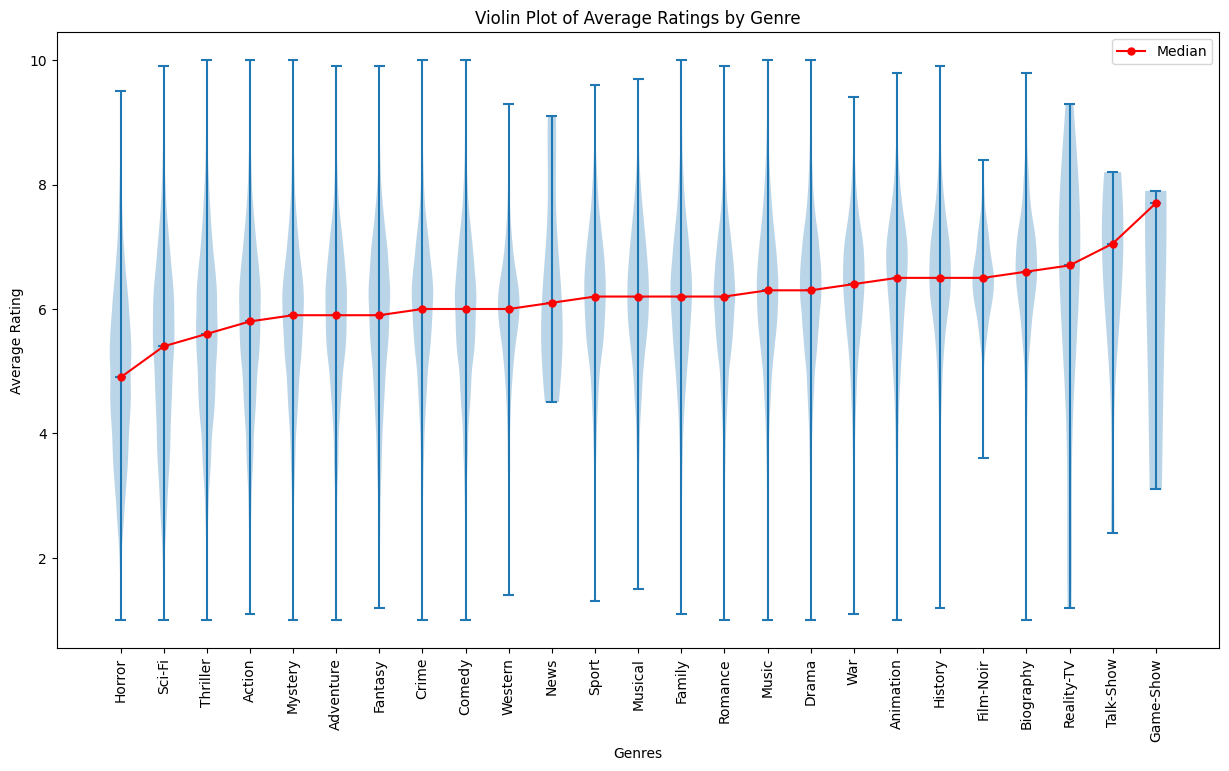

In [ ]:
data = [df_movies.loc[df_movies['genres'].str.contains(genre), 'averageRating'] for genre in unique_genres]
medians = [data[i].median() for i in range(len(unique_genres))]
sorted_indices = np.argsort(medians)
sorted_genres = [unique_genres[i] for i in sorted_indices]
sorted_data = [data[i] for i in sorted_indices]

plt.figure(figsize=(15, 8))
# Cria o violin plot
plt.violinplot(sorted_data, showmedians=True)

# Define os rótulos do eixo x
plt.xticks(np.arange(1, len(sorted_genres)+1), sorted_genres, rotation=90)

# Opcional: sobrepor os valores das medianas
plt.plot(np.arange(1, len(medians)+1), np.sort(medians), marker='o', color='red', label='Median', markersize=5)

plt.title('Violin Plot of Average Ratings by Genre')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.legend()
plt.show()

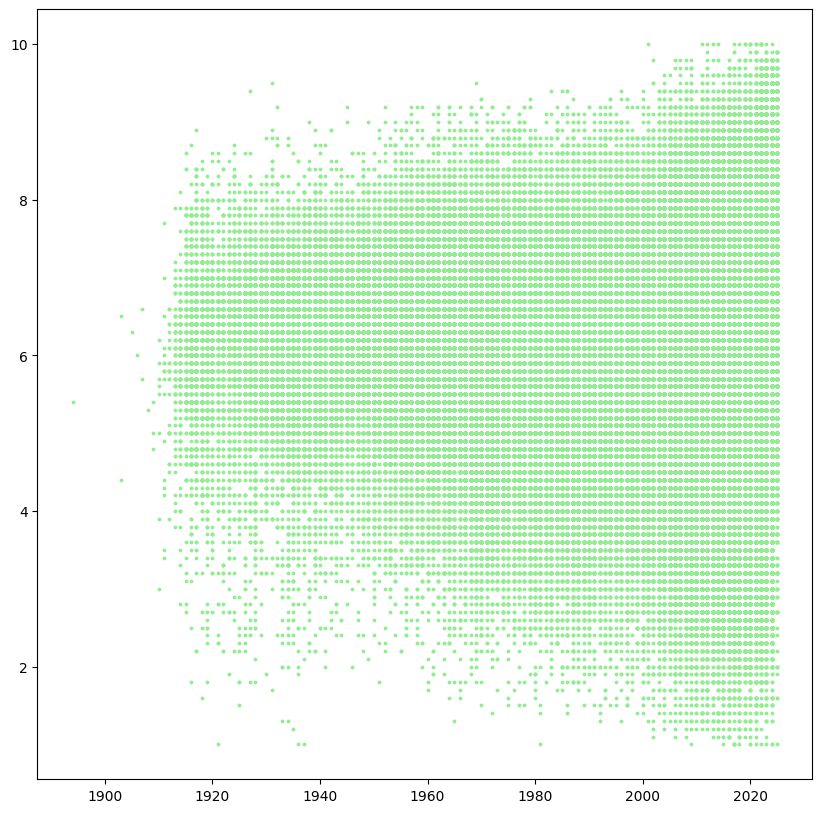

In [37]:
plt.figure(figsize=(10, 10))
plt.scatter(df_movies['startYear'],  df_movies['averageRating'], s=3, c='lightgreen')